In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from funcs_plotter import double_roc, single_roc, getEfficiency, \
                            getPurity, plotChart, plot_confusion_matrix
    

In [9]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')




In [35]:
df_qm = []
for i in range(5):
    df_qm.append(pd.read_pickle('output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize50000-testSize12500-foldIdx{}.pkl'.format(i)))


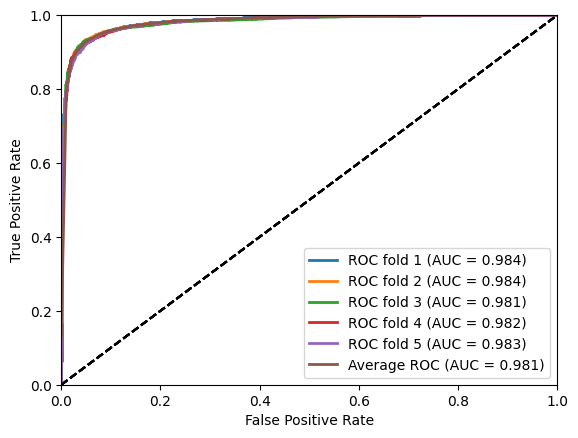

In [36]:
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

plt.figure()
for i in range(5):
    fpr, tpr, thresholds = roc_curve(df_qm[i]['trueLabels'], df_qm[i]['scores'])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    auc_score = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, f'ROC fold {i+1} (AUC = {auc_score:.3f})')
mean_tpr /= 5
mean_auc = auc(mean_fpr, mean_tpr)
plot_roc_curve(mean_fpr, mean_tpr, f'Average ROC (AUC = {mean_auc:.3f})')

plt.legend(loc='lower right')
plt.show()

In [39]:
df_cl = []
for i in range(5):
    df_cl.append(pd.read_pickle('output/result_Class-C100-gammaauto-weightBalanced-trainSize50000-testSize12500-foldIdx{}.pkl'.format(i)))


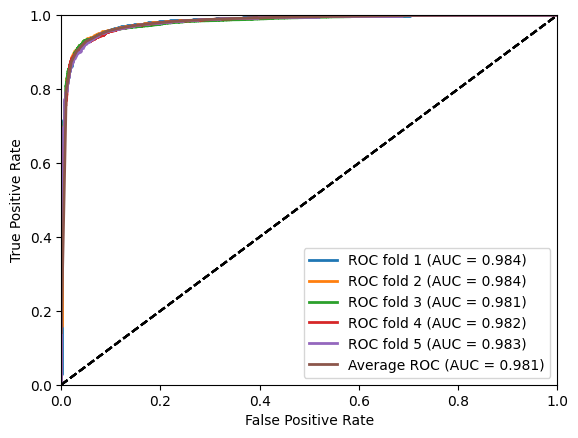

In [40]:
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

plt.figure()
for i in range(5):
    fpr, tpr, thresholds = roc_curve(df_cl[i]['trueLabels'], df_cl[i]['scores'])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    auc_score = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, f'ROC fold {i+1} (AUC = {auc_score:.3f})')
mean_tpr /= 5
mean_auc = auc(mean_fpr, mean_tpr)
plot_roc_curve(mean_fpr, mean_tpr, f'Average ROC (AUC = {mean_auc:.3f})')

plt.legend(loc='lower right')
plt.show()

In [2]:
#df_qm = getDataset(outputPath='output/', classical=False, trainSize=100)
#df_cl = getDataset(outputPath='output/', classical=True, trainSize=100)

In [10]:
df_qm = pd.read_pickle('output/result_Quant-alpha0p1-C1000000p0-singleMap1-pairMap1-interactionYY-weightBalanced-trainSize800-testSize200-foldIdx0.pkl')

In [11]:
df_cl = pd.read_pickle('output/result_Class-C1000000p0-gamma1-weightNone-trainSize160-testSize40-foldIdx0.pkl')

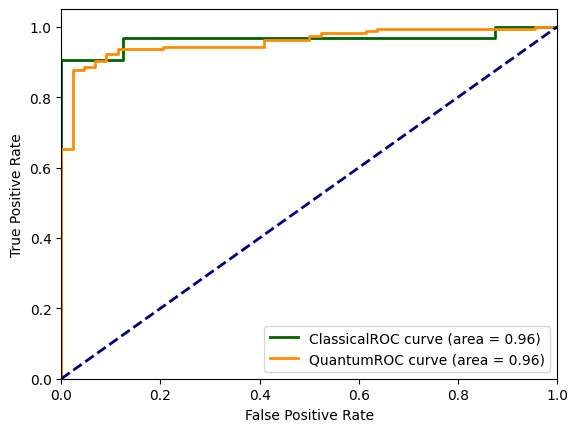

In [12]:
double_roc(df_cl, 'Classical', df_qm, 'Quantum')

In [37]:
#single_roc(df_qm,'')

In [38]:
#eff_class = {}
#purity_class = {}
#eff_quant = {}
#purity_quant = {}
#trainSizes = [50, 100, 500, 1000, 5000, 10000, 50000]
#for trainSize in trainSizes:
#    df_class = getDataset(outputPath='output/', classical=True, trainSize=trainSize)
#    df_quant = getDataset(outputPath='output/', classical=False, trainSize=trainSize)
#    eff_class[trainSize] = getEfficiency(df_class)
#    eff_quant[trainSize] = getEfficiency(df_quant)
#    purity_class[trainSize] = getPurity(df_class)
#    purity_quant[trainSize] = getPurity(df_quant)
    

In [39]:
#plotChart(dictClass=eff_class, dictQuant=eff_quant, yLabel='efficiency')

In [40]:
#plotChart(dictClass=purity_class, dictQuant=purity_quant, yLabel='purity')

[[0.69230769 0.30769231]
 [0.27027027 0.72972973]]


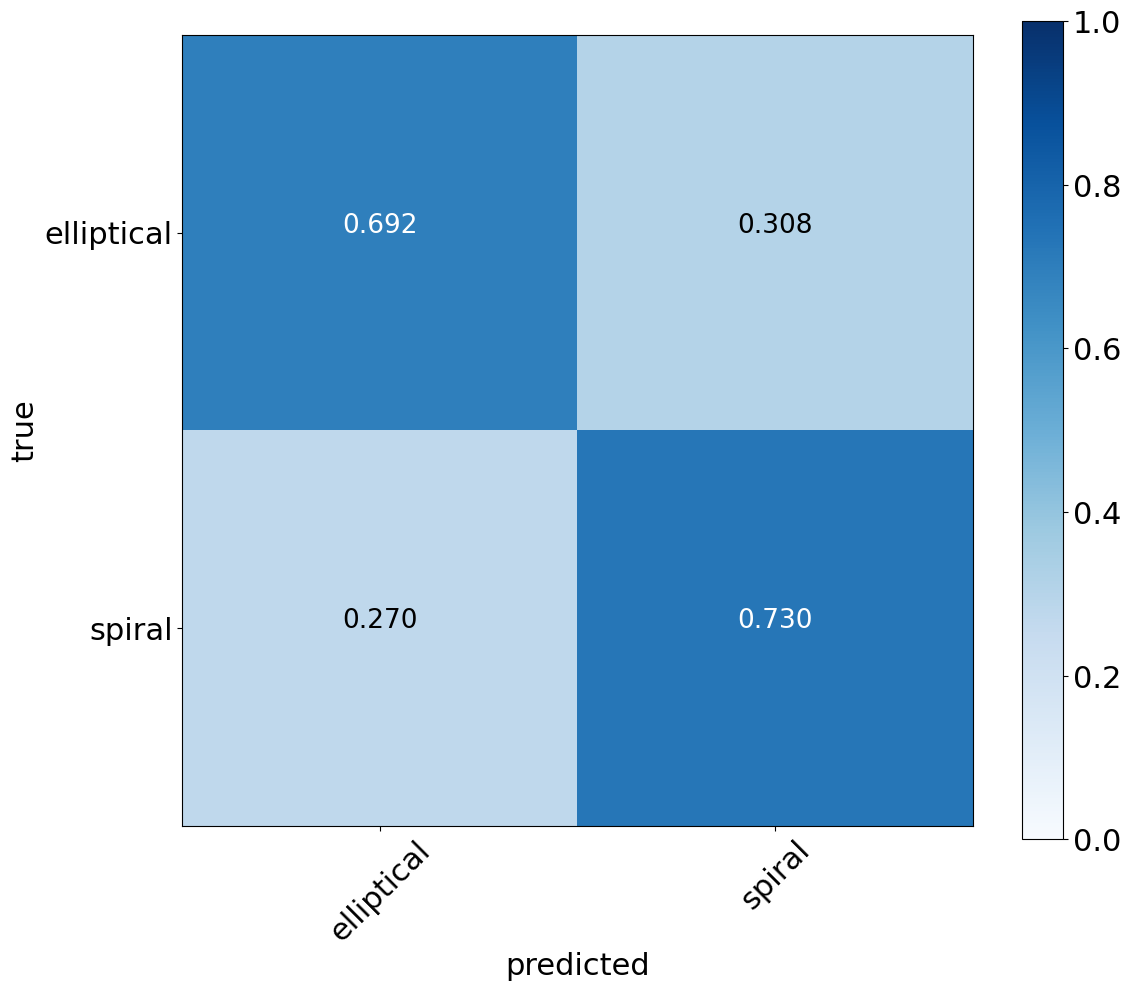

In [41]:
plot_confusion_matrix(df_qm['trueLabels'], df_qm['predictedLabels'], normalize_by_yTrue=True)


[[0.66666667 0.33333333]
 [0.07317073 0.92682927]]


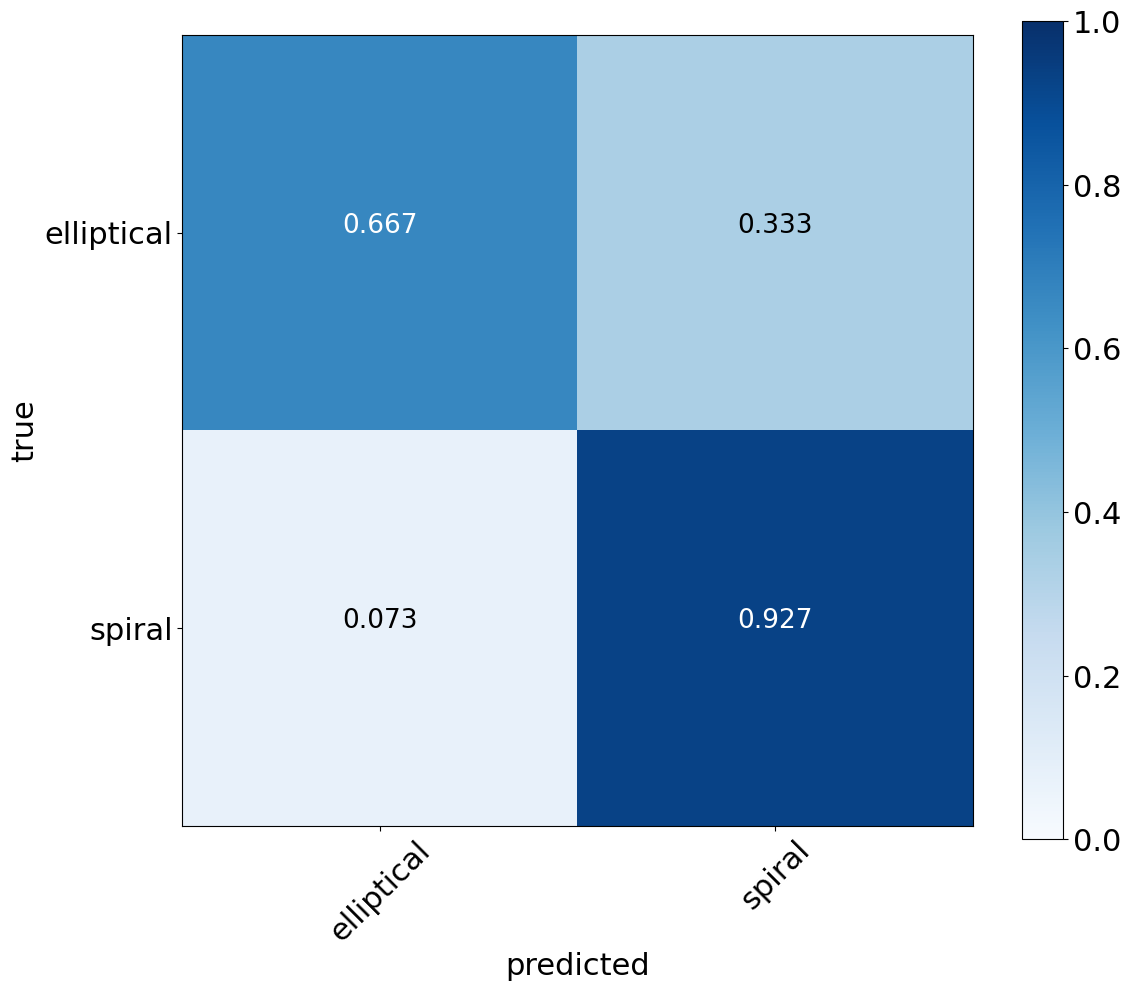

In [42]:
plot_confusion_matrix(df_cl['trueLabels'], df_cl['predictedLabels'], normalize_by_yTrue=True)


[[0.47368421 0.12903226]
 [0.52631579 0.87096774]]


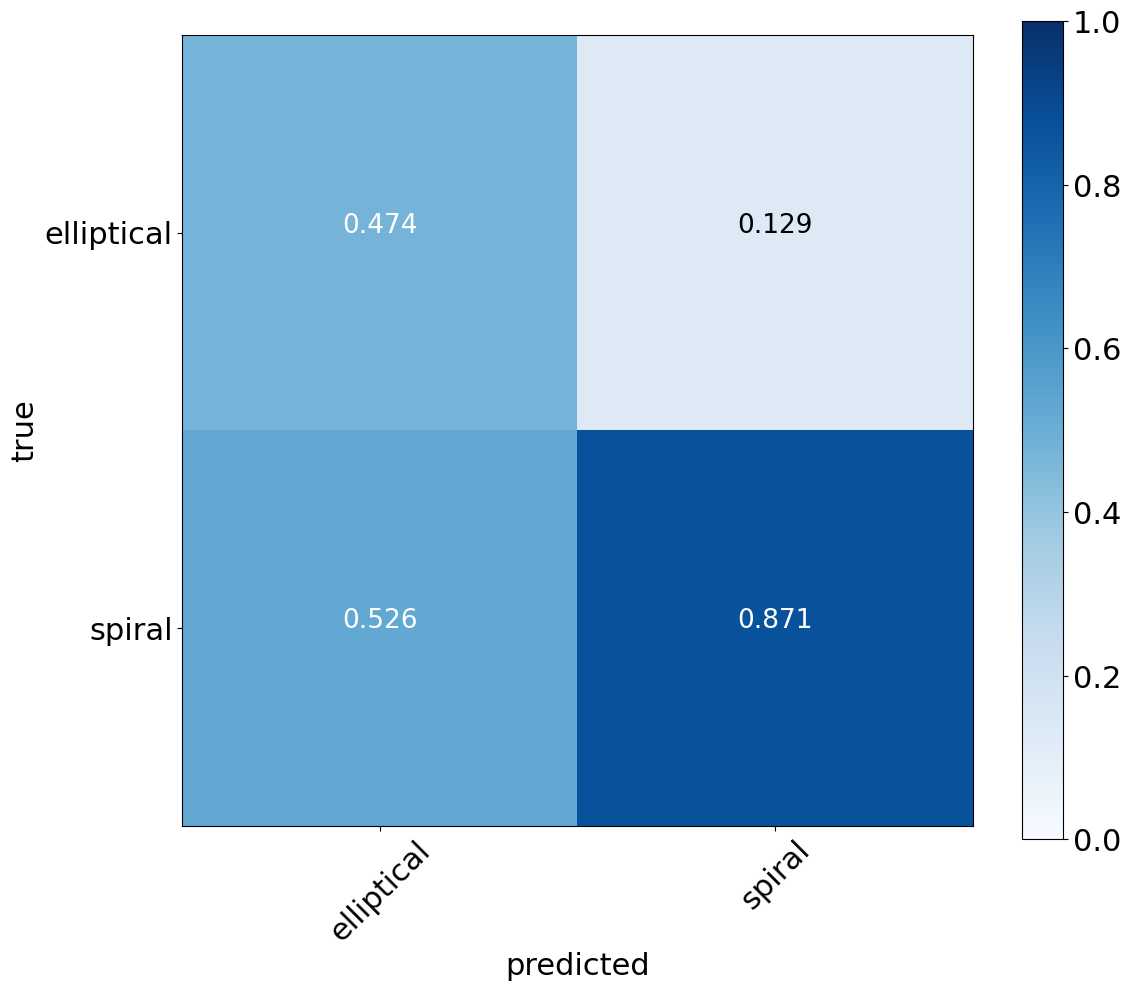

In [43]:
plot_confusion_matrix(df_qm['trueLabels'], df_qm['predictedLabels'], normalize_by_yPredicted=True)


[[0.66666667 0.07317073]
 [0.33333333 0.92682927]]


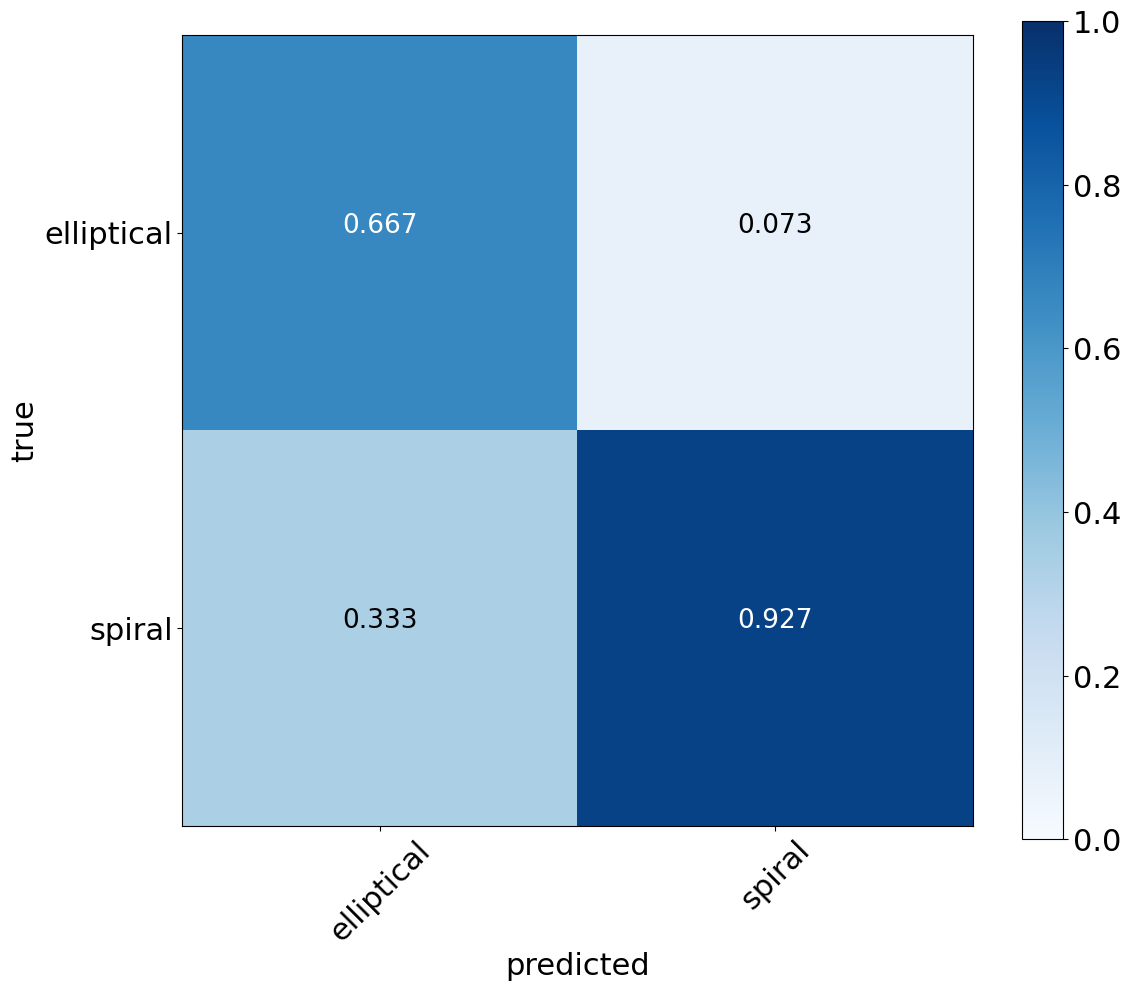

In [44]:
plot_confusion_matrix(df_cl['trueLabels'], df_cl['predictedLabels'], normalize_by_yPredicted=True)
